In [7]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor as KNN
%matplotlib inline

import pandas as pd
import numpy as np
import os, random
import sklearn

In [8]:
def GetPandasFromFileCSV(path):
    return pd.read_csv(path, delimiter=',')

def GetPandasFromFile(path, theSkipRow):
    return pd.read_csv(path, skiprows= theSkipRow , header=None)

def RemoveRowWithNAN(data):
    data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
    return data.reset_index()

def RemoveColumnsWithNull(data, num):
    complete_cols = [column for column in data.columns if len(data[column][data[column].isnull()]) < num]
    return data[complete_cols]

def ReomveRowwithNANWithNum(data):
    data = data.dropna(thresh=None)
    return data

def GetNumpyColumnFromIndex(theDF):
    theD = pd.DataFrame(theDF.values);
    return theD.as_matrix()

def CheckPandasNAN(data):
    theResult = pd.isnull(data)
    count = 0;
    for i in theResult:
        if(i == True): count+=1
    return "the number of NAN is :" , count

In [15]:
df =GetPandasFromFileCSV("result_ep.csv")

df.head()


,Unnamed: 0,New_TMY3,New_RNNs,Post_TMY3,Post_RNNs,Pre_TMY3,Pre_RNNs,Unnamed: 7,New_TMY3.1,New_RNNs.1,Post_TMY3.1,Post_RNNs.1,Pre_TMY3.1,Pre_RNNs.1
0,Jan,1.893836,94.170343,2.245674,112.626714,0.047506,148.093534,NaN,533944.41400,420326.0082,617203.83540,489194.3490,640970.82540,504689.85290
1,Feb,0.038964,3.014243,0.056591,3.520774,0.072178,21.114042,NaN,390636.20460,346056.1418,447642.45320,401305.8252,459411.43760,411484.51680
2,Mar,2061.596261,668.802558,2339.644622,785.429508,2126.164874,1060.282039,NaN,288969.94950,314982.1789,330562.84170,360279.5460,333416.01090,372118.57580
3,Apr,5838.669429,7544.875814,6488.224380,8656.153515,6225.315898,7232.065940,NaN,146360.39070,103851.8232,165165.45860,118705.1333,162761.65660,118710.21620
4,May,15485.521090,10733.114810,17038.022570,12322.803970,15397.166830,10339.756290,NaN,57938.14187,60905.4669,66027.78931,69689.7598,65822.53932,69836.71594


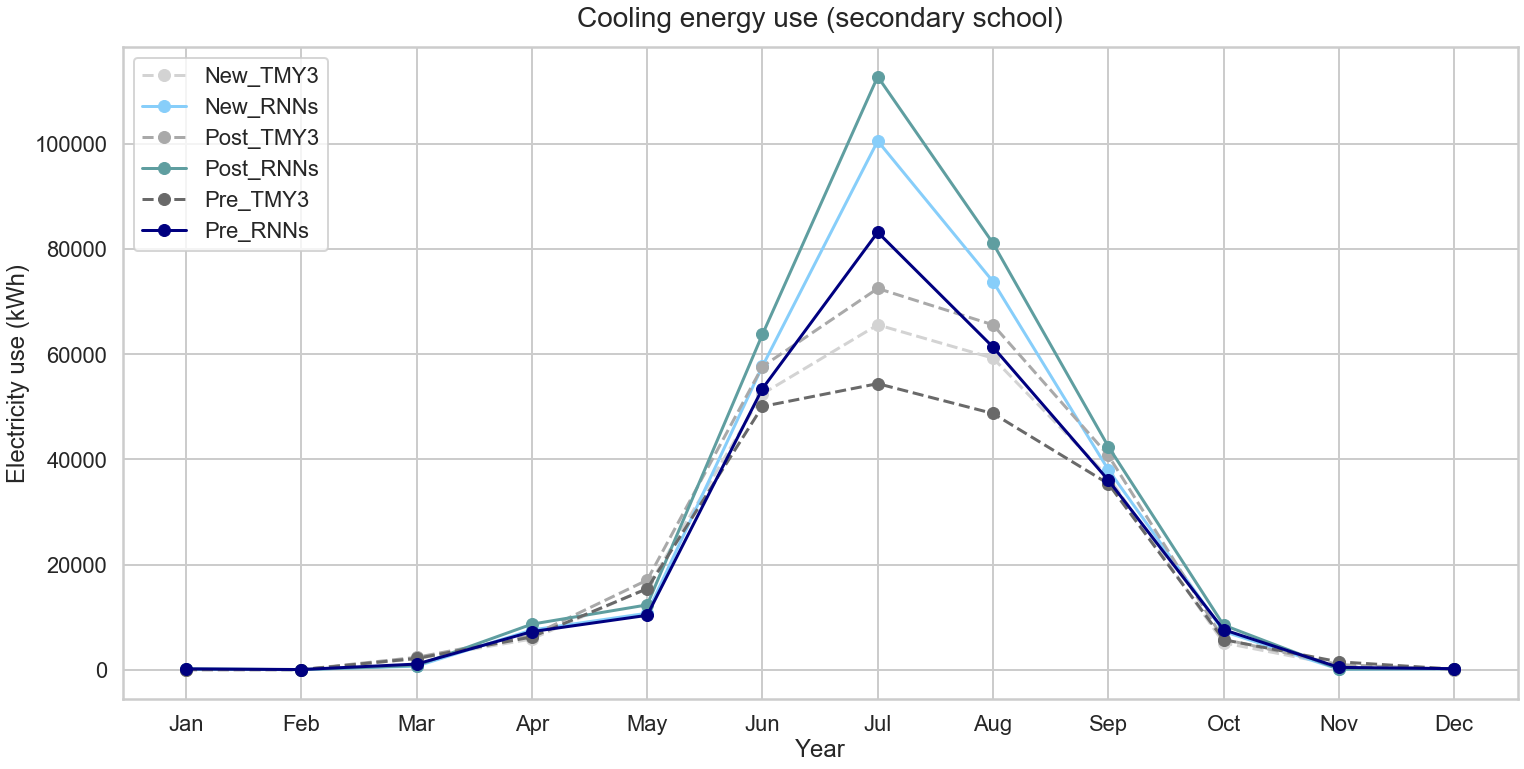

In [16]:
plt.figure(figsize=(25,12))
plt.plot(df['Unnamed: 0'], df['New_TMY3'], '--', color='lightgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['New_RNNs'], color='lightskyblue', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_TMY3'],'--', color='darkgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_RNNs'], color='cadetblue', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_TMY3'], '--', color='dimgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_RNNs'], color='navy', marker='o')


plt.title('Cooling energy use (secondary school)', fontsize=28,  pad=20)
plt.xlabel('Year', fontsize=24)
plt.ylabel('Electricity use (kWh)', fontsize=24)
plt.legend(['New_TMY3', 'New_RNNs', 'Post_TMY3','Post_RNNs', 'Pre_TMY3', 'Pre_RNNs'], loc='upper left')
plt.grid(True)
plt.show()

In [17]:
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import seaborn as sns
import math
sns.set_style("whitegrid")
sns.set_context("poster")


# plt.figure(figsize=(25,12))
# plt.plot(df['Unnamed: 0'], df['New_TMY3'], color='lightgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['New_RNNs'], color='lightpink', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_TMY3'], color='darkgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_RNNs'], color='salmon', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_TMY3'], color='dimgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_RNNs'], color='firebrick', marker='o')


# plt.title('Cooling energy use (secondary school)', fontsize=28,  pad=20)
# plt.xlabel('Year', fontsize=24)
# plt.ylabel('Electricity use (kWh)', fontsize=24)
# plt.legend(['New_TMY3', 'New_RNNs', 'Post_TMY3','Post_RNNs', 'Pre_TMY3', 'Pre_RNNs'], loc='upper left')
# plt.grid(True)
# plt.show()

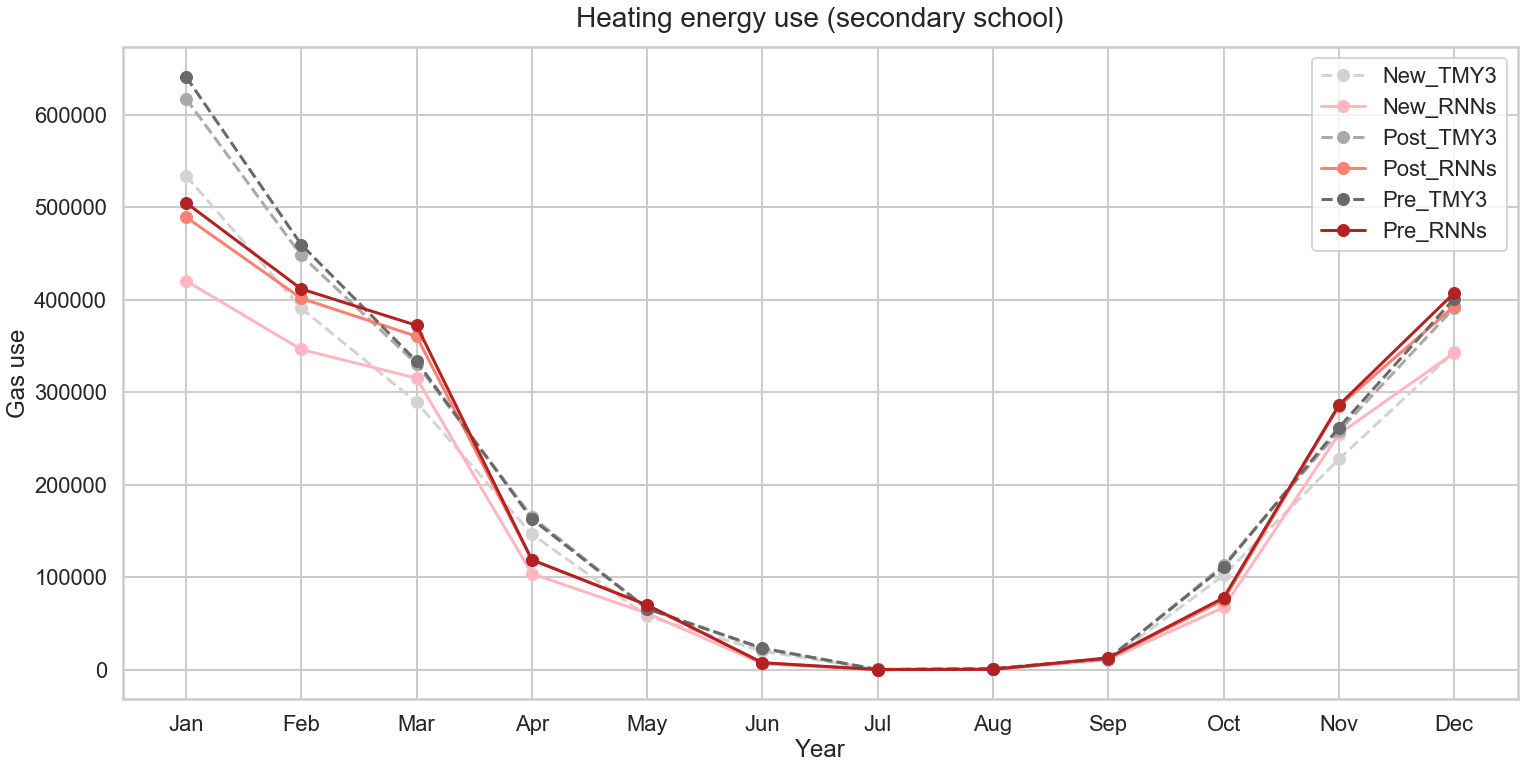

In [18]:
plt.figure(figsize=(25,12))
plt.plot(df['Unnamed: 0'], df['New_TMY3.1'], '--',color='lightgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['New_RNNs.1'], color='lightpink', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_TMY3.1'], '--',color='darkgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_RNNs.1'], color='salmon', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_TMY3.1'], '--', color='dimgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_RNNs.1'], color='firebrick', marker='o')


plt.title('Heating energy use (secondary school)', fontsize=28,  pad=20)
plt.xlabel('Year', fontsize=24)
plt.ylabel('Gas use', fontsize=24)
plt.legend(['New_TMY3', 'New_RNNs', 'Post_TMY3','Post_RNNs', 'Pre_TMY3', 'Pre_RNNs'], loc='upper right')
plt.grid(True)
plt.show()

In [19]:
df =GetPandasFromFileCSV("result_ep_smalloffice_final.csv")

df.head()


,Unnamed: 0,New_TMY3,New_Real,New_RNNs,Post_TMY3,Post_Real,Post_RNNs,Pre_TMY3,Pre_Real,Pre_RNNs,Unnamed: 10,New_TMY3.1,New_Real.1,New_RNNs.1,Post_TMY3.1,Post_Real.1,Post_RNNs.1,Pre_TMY3.1,Pre_Real.1,Pre_RNNs.1
0,Jan,0.056873,0.049793,0.256643,0.077880,0.135236,1.155194,0.351031,1.570639,6.437464,NaN,4996.916559,6746.668096,4051.523445,6987.508880,9865.044189,5723.986463,13810.090520,18939.221880,11945.166540
1,Feb,0.092432,0.165716,0.905161,0.153938,0.345255,1.657524,2.137729,3.704164,12.011459,NaN,3300.241041,5673.311806,3043.077869,4460.162158,8281.727761,4304.043323,9310.652856,16079.005050,9264.039034
2,Mar,18.865393,0.914594,6.582329,38.835402,2.629411,17.839331,63.150886,10.705681,48.713427,NaN,2129.219588,5901.584979,2806.481237,2766.798643,8142.896607,3512.648801,6430.356708,15496.844120,7596.164080
3,Apr,51.034123,11.371490,55.387552,93.459436,31.985736,118.485765,147.090976,62.565464,194.849583,NaN,696.667800,2271.377617,580.225334,916.167288,3027.183305,793.563596,2447.565598,6499.686327,2162.305510
4,May,171.704434,3.154015,93.619983,308.809610,12.372869,197.564481,427.017072,26.729004,261.215644,NaN,86.279828,802.669116,117.090025,146.932830,940.135222,185.590121,466.102047,2299.059781,617.840715


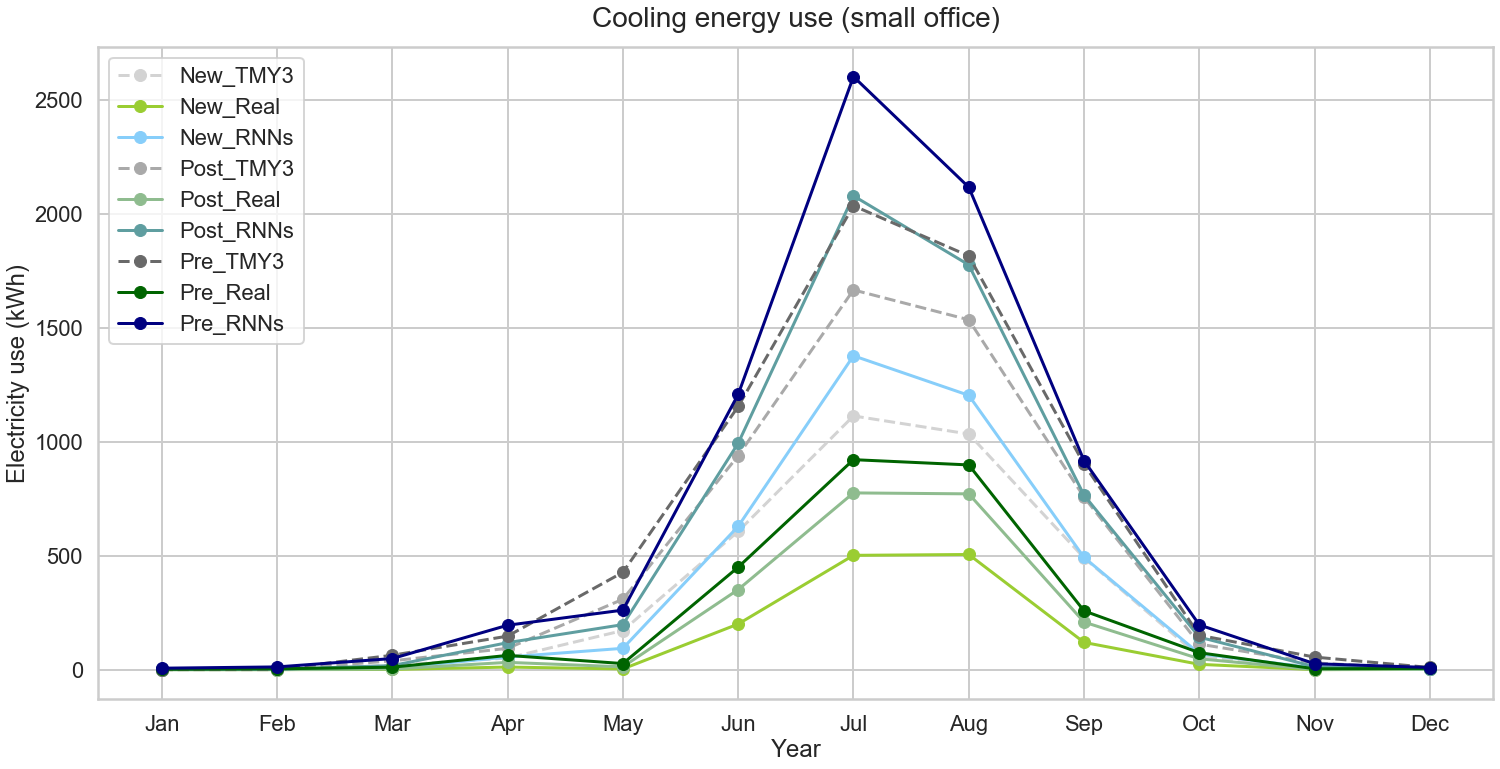

In [31]:
plt.figure(figsize=(25,12))
plt.plot(df['Unnamed: 0'], df['New_TMY3'], '--', color='lightgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['New_Real'], color='yellowgreen', marker='o')
plt.plot(df['Unnamed: 0'], df['New_RNNs'], color='lightskyblue', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_TMY3'], '--', color='darkgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_Real'], color='darkseagreen', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_RNNs'], color='cadetblue', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_TMY3'], '--', color='dimgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_Real'], color='darkgreen', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_RNNs'], color='navy', marker='o')


plt.title('Cooling energy use (small office)', fontsize=28,  pad=20)
plt.xlabel('Year', fontsize=24)
plt.ylabel('Electricity use (kWh)', fontsize=24)
plt.legend(['New_TMY3','New_Real', 'New_RNNs', 'Post_TMY3','Post_Real','Post_RNNs', 'Pre_TMY3','Pre_Real', 'Pre_RNNs'], loc='upper left')
plt.grid(True)
plt.show()

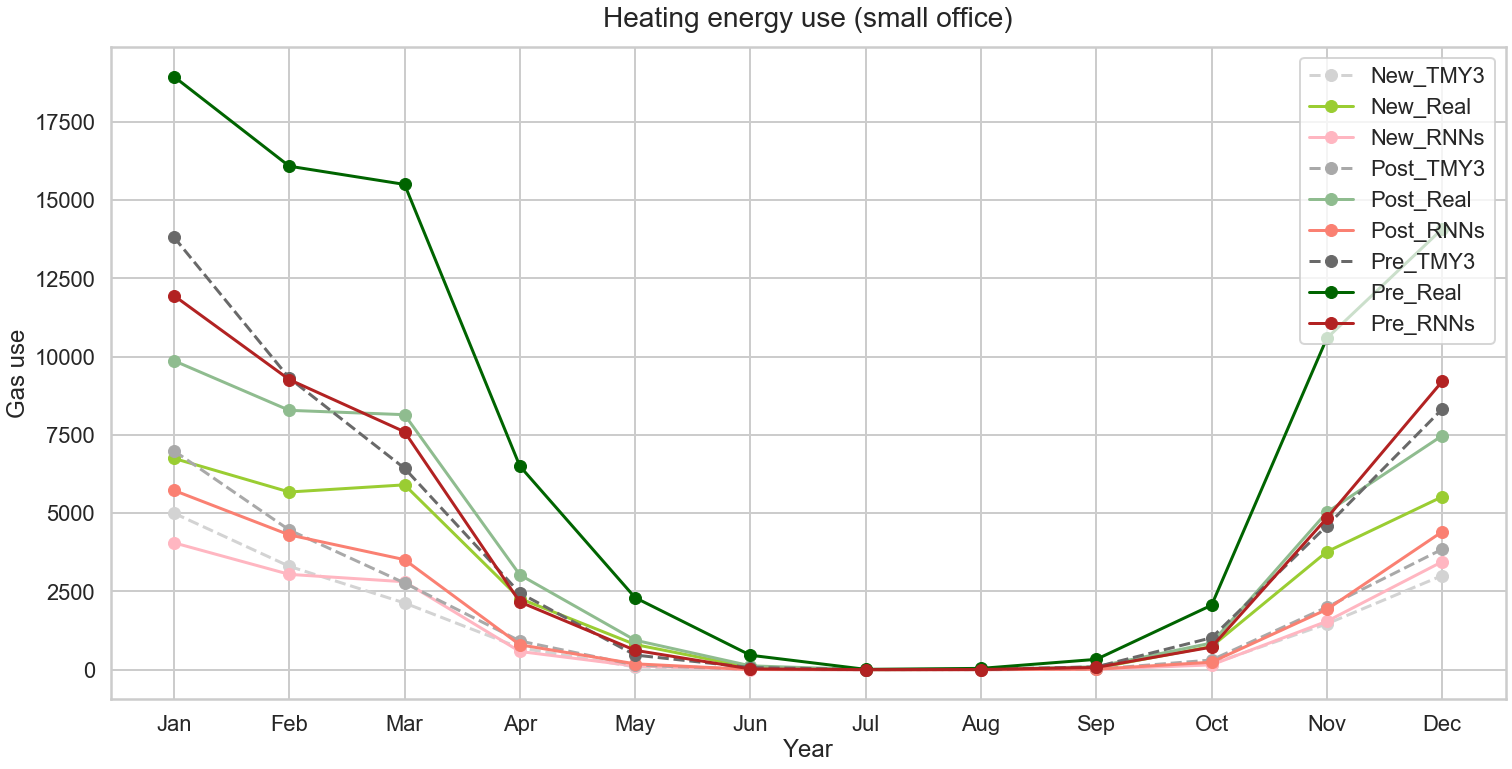

In [32]:
plt.figure(figsize=(25,12))
plt.plot(df['Unnamed: 0'], df['New_TMY3.1'], '--',color='lightgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['New_Real.1'], color='yellowgreen', marker='o')
plt.plot(df['Unnamed: 0'], df['New_RNNs.1'], color='lightpink', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_TMY3.1'], '--',color='darkgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_Real.1'], color='darkseagreen', marker='o')
plt.plot(df['Unnamed: 0'], df['Post_RNNs.1'], color='salmon', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_TMY3.1'], '--',color='dimgrey', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_Real.1'], color='darkgreen', marker='o')
plt.plot(df['Unnamed: 0'], df['Pre_RNNs.1'], color='firebrick', marker='o')


plt.title('Heating energy use (small office)', fontsize=28,  pad=20)
plt.xlabel('Year', fontsize=24)
plt.ylabel('Gas use', fontsize=24)
plt.legend(['New_TMY3','New_Real', 'New_RNNs', 'Post_TMY3','Post_Real','Post_RNNs', 'Pre_TMY3','Pre_Real', 'Pre_RNNs'], loc='upper right')
plt.grid(True)
plt.show()

In [65]:
df =GetPandasFromFileCSV("result_ep_school.csv")

df.head()


,Unnamed: 0,New_TMY3,New_RNNs,Post_TMY3,Post_RNNs,Pre_TMY3,Pre_RNNs,Unnamed: 7,New_TMY3.1,New_RNNs.1,Post_TMY3.1,Post_RNNs.1,Pre_TMY3.1,Pre_RNNs.1
0,Jan,1.893836,94.170343,2.245674,112.626714,0.047506,148.093534,NaN,533944.41400,420326.0082,617203.83540,489194.3490,640970.82540,504689.85290
1,Feb,0.038964,3.014243,0.056591,3.520774,0.072178,21.114042,NaN,390636.20460,346056.1418,447642.45320,401305.8252,459411.43760,411484.51680
2,Mar,2061.596261,668.802558,2339.644622,785.429508,2126.164874,1060.282039,NaN,288969.94950,314982.1789,330562.84170,360279.5460,333416.01090,372118.57580
3,Apr,5838.669429,7544.875814,6488.224380,8656.153515,6225.315898,7232.065940,NaN,146360.39070,103851.8232,165165.45860,118705.1333,162761.65660,118710.21620
4,May,15485.521090,10733.114810,17038.022570,12322.803970,15397.166830,10339.756290,NaN,57938.14187,60905.4669,66027.78931,69689.7598,65822.53932,69836.71594


In [77]:
# plt.figure(figsize=(25,12))
# plt.plot(df['Unnamed: 0'], df['New_TMY3'], color='lightgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['New_RNNs'], color='lightskyblue', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_TMY3'], color='darkgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_RNNs'], color='cadetblue', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_TMY3'], color='dimgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_RNNs'], color='navy', marker='o')


# plt.title('Cooling energy use (small office)', fontsize=28,  pad=20)
# plt.xlabel('Year', fontsize=24)
# plt.ylabel('Electricity use (kWh)', fontsize=24)
# plt.legend(['New_TMY3', 'New_RNNs', 'Post_TMY3','Post_RNNs', 'Pre_TMY3', 'Pre_RNNs'], loc='upper left')
# plt.grid(True)
# plt.show()

In [78]:
# plt.figure(figsize=(25,12))
# plt.plot(df['Unnamed: 0'], df['New_TMY3.1'], color='lightgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['New_RNNs.1'], color='lightpink', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_TMY3.1'], color='darkgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['Post_RNNs.1'], color='salmon', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_TMY3.1'], color='dimgrey', marker='o')
# plt.plot(df['Unnamed: 0'], df['Pre_RNNs.1'], color='firebrick', marker='o')


# plt.title('Heating energy use (small office)', fontsize=28,  pad=20)
# plt.xlabel('Year', fontsize=24)
# plt.ylabel('Gas use', fontsize=24)
# plt.legend(['New_TMY3', 'New_RNNs', 'Post_TMY3','Post_RNNs', 'Pre_TMY3', 'Pre_RNNs'], loc='upper right')
# plt.grid(True)
# plt.show()